In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df=pd.read_excel('./시도별 전출입 인구수.xlsx',engine='openpyxl', header=0)

In [8]:
df=df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [11]:
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')

In [17]:
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul=df_seoul.rename({'전입지별':'전입지'},axis=1)
df_seoul=df_seoul.set_index('전입지')

In [24]:
col_years=list(map(str,range(2010,2017+1)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]


In [26]:
df_4=df_4.transpose()

In [27]:
df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


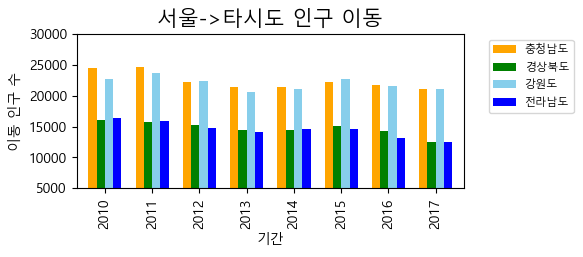

In [56]:
df_4.plot(kind='bar',figsize=(5,2),width=0.7,color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구 이동',size=15)
plt.legend(bbox_to_anchor=(1.05,1),fontsize=8)
plt.ylabel('이동 인구 수')
plt.xlabel('기간')
plt.ylim(5000,30000)


plt.show()

In [58]:
df_4=df_4.transpose()

In [59]:
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [61]:
df_4['합계']=df_4.sum(axis=1)
#axis=0 -> 행 단위 순서 / axis=1 -> 열 단위 순서
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,359066.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,235480.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,351462.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,232070.0


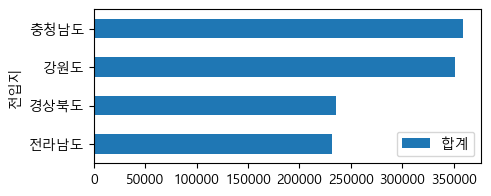

In [69]:
df_total=df_4[['합계']].sort_values(by='합계',ascending=True)
df_total.plot(kind='barh',figsize=(5,2))

plt.show()

In [68]:
df_total

,합계
전입지,
충청남도,359066.0
경상북도,235480.0
강원도,351462.0
전라남도,232070.0
